In [1]:
import pandas as pd
import numpy as np
import keras
from tensorflow import keras
from keras.datasets import cifar10
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,Activation,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2

In [2]:
data = cifar10.load_data()

In [3]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

In [4]:
(x_train.shape,y_train.shape , x_test.shape,y_test.shape)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Normalization

In [6]:
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_test = x_test.astype('float32')/255

In [7]:
#y_train=y_train.reshape(50000,)

60000 32x32 colour images

In [8]:
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

10 unique values

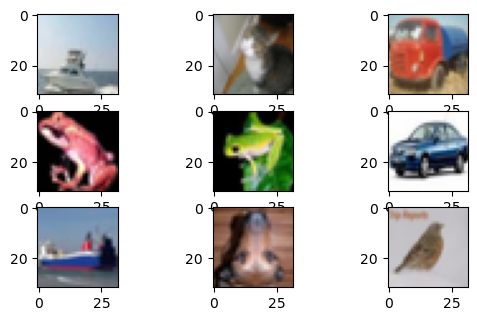

In [9]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i].reshape(32,32,3))

In [10]:
#convert y_train and y_test into 10 categories
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test,10)

In [11]:
(x_train.shape,y_train.shape , x_test.shape,y_test.shape)

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [12]:
#build 1st model
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:])) #Convolutional layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu')) #Convolutional layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu')) #Convolutional layer 3
model.add(Flatten())
model.add(Dense(512, activation='relu')) # Fully connected layer 1
model.add(Dense(10, activation='softmax')) # Fully connected layer 2
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [15]:
#mod = model.fit(x_train,y_train,batch_size=128,epochs=10)

Epoch 1/10
391/391 [==============================] - 66s 165ms/step - loss: 1.4862 - accuracy: 0.4661
Epoch 2/10
391/391 [==============================] - 65s 167ms/step - loss: 1.0606 - accuracy: 0.6275
Epoch 3/10
391/391 [==============================] - 66s 169ms/step - loss: 0.8696 - accuracy: 0.6942
Epoch 4/10
391/391 [==============================] - 67s 171ms/step - loss: 0.7393 - accuracy: 0.7395
Epoch 5/10
391/391 [==============================] - 67s 171ms/step - loss: 0.6348 - accuracy: 0.7788
Epoch 6/10
391/391 [==============================] - 68s 173ms/step - loss: 0.5263 - accuracy: 0.8184
Epoch 7/10
391/391 [==============================] - 68s 173ms/step - loss: 0.4216 - accuracy: 0.8546
Epoch 8/10
391/391 [==============================] - 70s 179ms/step - loss: 0.3207 - accuracy: 0.8904
Epoch 9/10
391/391 [==============================] - 80s 203ms/step - loss: 0.2250 - accuracy: 0.9254
Epoch 10/10
391/391 [==============================] - 66s 170ms/step - l

In [16]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [17]:
model = pickle.load(open('model.pkl','rb'))

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.1032 - accuracy: 0.7254


[1.1032421588897705, 0.7253999710083008]

(32, 32, 3)
AxesImage(size=(377, 236)) AxesImage(size=(32, 32))


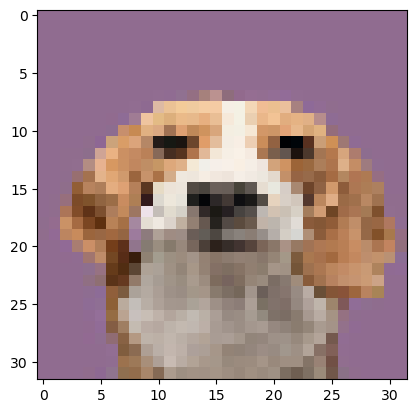

In [42]:
from PIL import Image
img = Image.open("dog.jpg")
img_array = np.array(img)
# print(img_array.shape)
new_array = cv2.resize(img_array,(32,32))
print(new_array.shape)
input_img = np.expand_dims(new_array,axis=0)
input_img = input_img/255.0
plt.imshow(input_img.reshape(32,32,3))
plt.show()

In [39]:
y_pred = model.predict(input_img)

1/1 [==============================] - 0s 23ms/step


In [40]:
class_names[np.argmax(y_pred)]

'dog'

AxesImage(size=(377, 236))


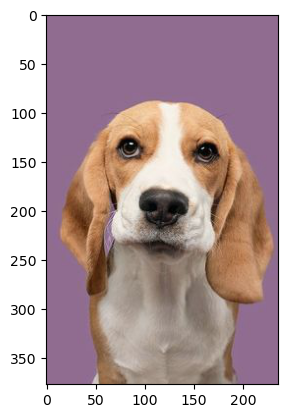

In [44]:
print(plt.imshow(img))